# Introduction to scikit-learn

scikit-learn is a popular Python library for machine learning, providing tools for classification, regression, clustering, dimensionality reduction, and more. In this notebook, you will learn to load datasets, perform supervised and unsupervised learning, and explore self-supervised learning.

---

## Part 1: Loading and Visualizing Datasets

In this part, you'll learn how to load and visualize datasets using scikit-learn.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np

### Exercise 1: Load the Iris dataset

- Load the Iris dataset using `datasets.load_iris()`.
- Visualize the first two features using a scatter plot (`plt.scatter()`), with each species represented by a different color.

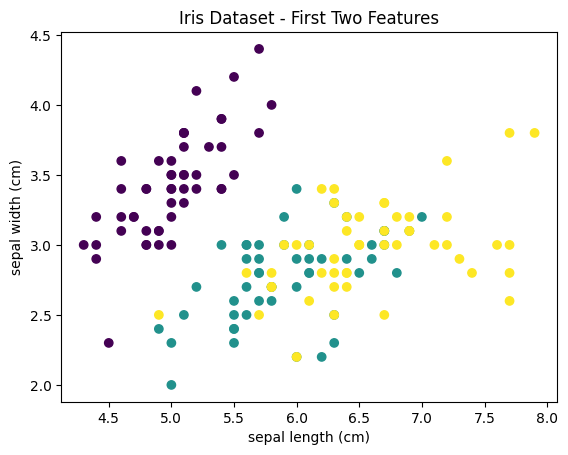

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Visualize the first two features
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Iris Dataset - First Two Features')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### Exercise 2: Load the Wine dataset

* Load the Wine dataset using `datasets.load_wine()`.
* Create a 2D scatter plot of the first two features of the dataset, using different colors for the three wine classes.

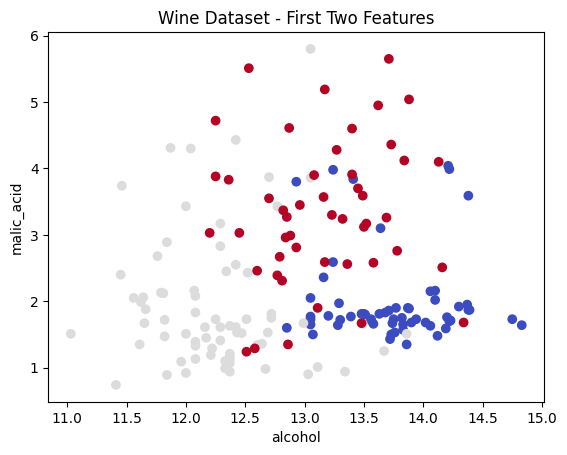

In [ ]:
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Visualize the first two features
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Wine Dataset - First Two Features')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

## Part 2: Supervised Learning

In this part, you'll perform classification and regression using scikit-learn models.

Classification: Decision Tree and Logistic Regression

### Exercise 3: Classification with Decision Tree

* Load the Iris dataset.
* Train a Decision Tree classifier (`DecisionTreeClassifier()`) on the dataset.
* Visualize the decision boundary using a scatter plot.

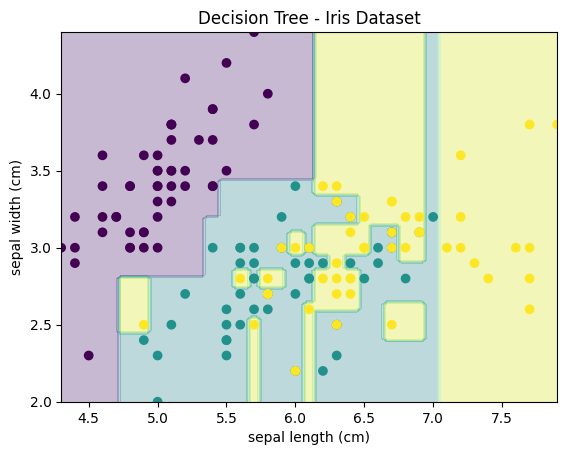

In [ ]:
# Load Iris dataset and train Decision Tree classifier
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target  # Use only first two features for simplicity
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Decision Tree - Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### Exercise 4: Classification with Logistic Regression

* Load the Wine dataset.
* Train a Logistic Regression model (`LogisticRegression()`) on the dataset.
* Plot the decision boundary and visualize the predictions.

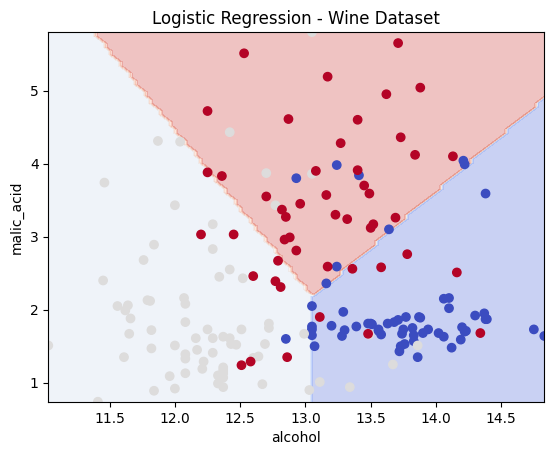

In [ ]:
# Load Wine dataset and train Logistic Regression model
wine = datasets.load_wine()
X, y = wine.data[:, :2], wine.target  # Use first two features
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Logistic Regression - Wine Dataset')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

### Exercise 5: Linear Regression on the California Housing dataset

- Load the California Housing dataset using `datasets.fetch_california_housing()`.
- Train a Linear Regression model (`LinearRegression()`) to predict house prices.
- Plot the predicted values vs. the true values using `plt.scatter()`.

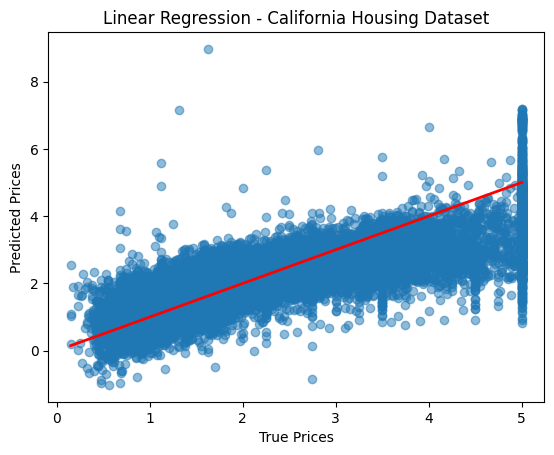

In [ ]:
# Load California Housing dataset and train Linear Regression model
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predict and plot results
y_pred = lin_reg.predict(X)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title('Linear Regression - California Housing Dataset')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()

## Part 3: Unsupervised Learning (PCA)

Principal Component Analysis (PCA) is used to reduce the dimensionality of data.

### Exercise 6: PCA on the Iris dataset

* Load the Iris dataset.
* Apply PCA (`PCA()`) to reduce the dataset to 2 components.
* Plot the two principal components, coloring the points by species.

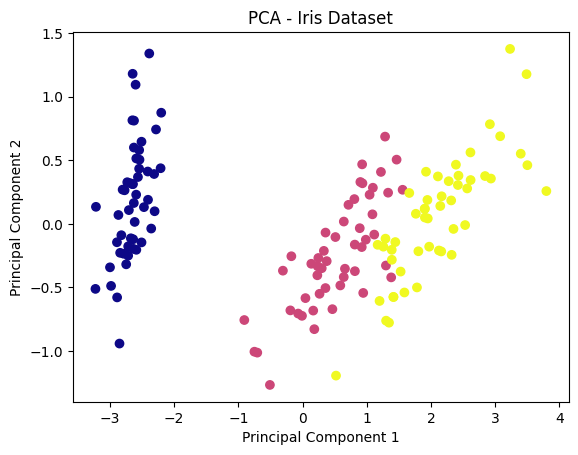

In [ ]:
# Load Iris dataset and apply PCA
iris = datasets.load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.title('PCA - Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Part 4: Self-Supervised Learning (Time Series Prediction)

In this exercise, you will work with a synthetic time series signal and use a regression model to predict the next five values in the series. This is an example of self-supervised learning, as the target is directly derived from the input data.


### Exercise 7: Self-Supervised Learning with Time Series Prediction

- Create a synthetic sine wave as the signal using `np.sin()`.
- Create the input features (`X`) from the signal by taking sliding windows of 5 consecutive values.
- The target (`y`) will be the next value in the sequence, i.e., the 6th value after the sliding window.
- Train a regression model (`LinearRegression()`) to predict the next value in the sequence based on the sliding window of previous values.
- Plot the true signal and the predicted values for the next 5 steps on the same plot.



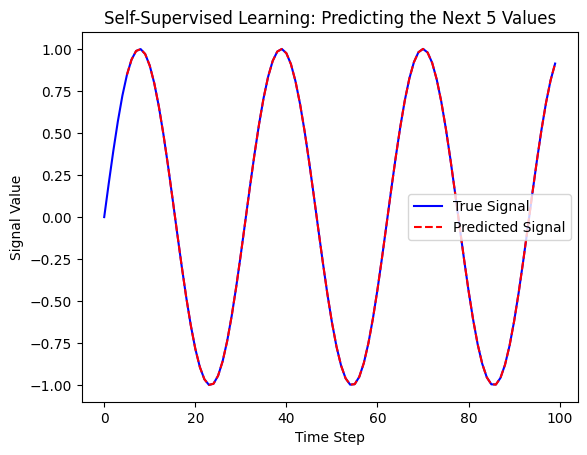

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a synthetic sine wave signal
n_points = 100
x = np.linspace(0, 20, n_points)
signal = np.sin(x)

# Prepare the dataset: input is 5 consecutive values, target is the next (6th) value
window_size = 5
X = []
y = []

for i in range(len(signal) - window_size):
    X.append(signal[i:i + window_size])  # 5 consecutive values
    y.append(signal[i + window_size])    # next value (the 6th)

X = np.array(X)
y = np.array(y)

# Train a Linear Regression model to predict the next value in the sequence
model = LinearRegression()
model.fit(X, y)

# Predict the next 5 values for the signal
y_pred = model.predict(X)

# Plot the original signal and the predicted values
plt.plot(signal, label="True Signal", color='blue')
plt.plot(np.arange(window_size, n_points), y_pred, label="Predicted Signal", color='red', linestyle='--')
plt.title('Self-Supervised Learning: Predicting the Next 5 Values')
plt.xlabel('Time Step')
plt.ylabel('Signal Value')
plt.legend()
plt.show()